In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = json.load(open("ABSA_prediction_data_local.json", "r"))
data = pd.DataFrame(data, columns=["text", "aspect","polarity", "category"])

In [6]:
data.head()

,text,aspect,polarity,category
0,But the staff was so horrible to us.,staff,negative,service
1,"To be completely fair, the only redeeming fact...","food,",positive,food
2,"The food is uniformly exceptional, with a very...",food,positive,food
3,"The food is uniformly exceptional, with a very...",kitchen,positive,food
4,"The food is uniformly exceptional, with a very...",menu,neutral,food


polarity
positive    58.405502
negative    22.032603
neutral     17.753439
conflict     1.808456
Name: proportion, dtype: float64

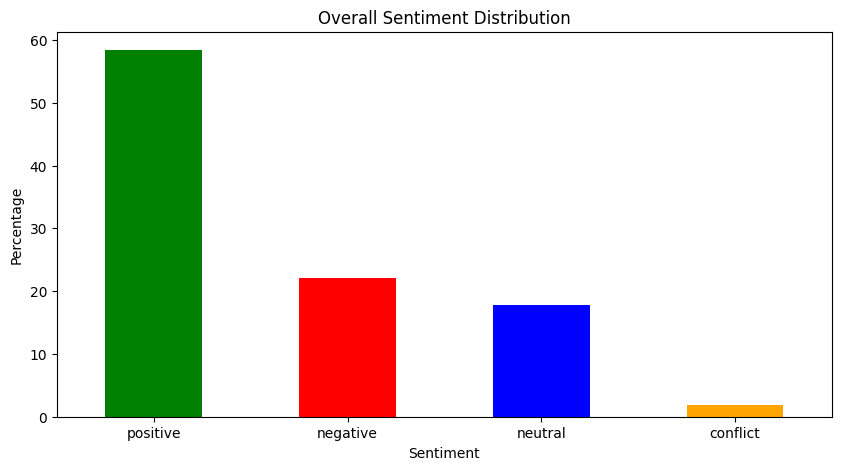

In [40]:

predictions_df = pd.DataFrame(data)

# Overall sentiment distribution
overall_sentiment = predictions_df['polarity'].value_counts(normalize=True) * 100

# Category-wise sentiment distribution
category_sentiment = predictions_df.groupby('category')['polarity'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting overall sentiment distribution
plt.figure(figsize=(10, 5))
overall_sentiment.plot(kind='bar', color=['green', 'red', 'blue', 'orange'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# plt.show()
plt.savefig("overall.png")


In [23]:
overall_sentiment

polarity
positive    58.405502
negative    22.032603
neutral     17.753439
conflict     1.808456
Name: proportion, dtype: float64

### Positive Sentiment (58.41%):

The majority of the customer reviews express positive sentiments. This indicates that most customers are satisfied with their experience at the restaurant. Positive feedback could relate to various aspects such as food quality, service, ambiance, or value for money. We shall do detail analysis with category-wise polarity.

Below is the list of most of aspect items seen in the positive reviews.

In [19]:
positive_sent = data[data["polarity"] == "positive"]["aspect"].value_counts()
list(positive_sent.items())[:10]

[('food', 189),
 ('service', 86),
 ('place', 55),
 ('staff', 36),
 ('food,', 29),
 ('service.', 27),
 ('pizza', 24),
 ('menu', 22),
 ('sushi', 21),
 ('atmosphere', 21)]

### Negative Sentiment (22.03%):

A significant portion of reviews is negative. This suggests there are notable areas of concern that need attention. Common issues in restaurants include poor service, long wait times, unsatisfactory food quality, or high prices.

Below is the list for most of the aspect items, having a negative polarity.

In [20]:
negative_sent = data[data["polarity"] == "negative"]["aspect"].value_counts()
list(negative_sent.items())[:10]

[('food', 47),
 ('service', 44),
 ('place', 29),
 ('table', 15),
 ('wait', 15),
 ('portions', 12),
 ('prices', 11),
 ('waiter', 10),
 ('menu', 10),
 ('staff', 9)]


### Neutral Sentiment (17.75%):

A substantial number of reviews are neutral. These reviews likely contain mixed feelings or mention aspects that did not strongly impact the customer's overall experience.

In [21]:
neutral_sent = data[data["polarity"] == "neutral"]["aspect"].value_counts()
list(neutral_sent.items())[:10]

[('food', 42),
 ('dinner', 21),
 ('bar', 16),
 ('table', 13),
 ('lunch', 11),
 ('dinner.', 11),
 ('menu', 10),
 ('food.', 8),
 ('reservation', 8),
 ('drink', 7)]

## Category-Wise Sentiment

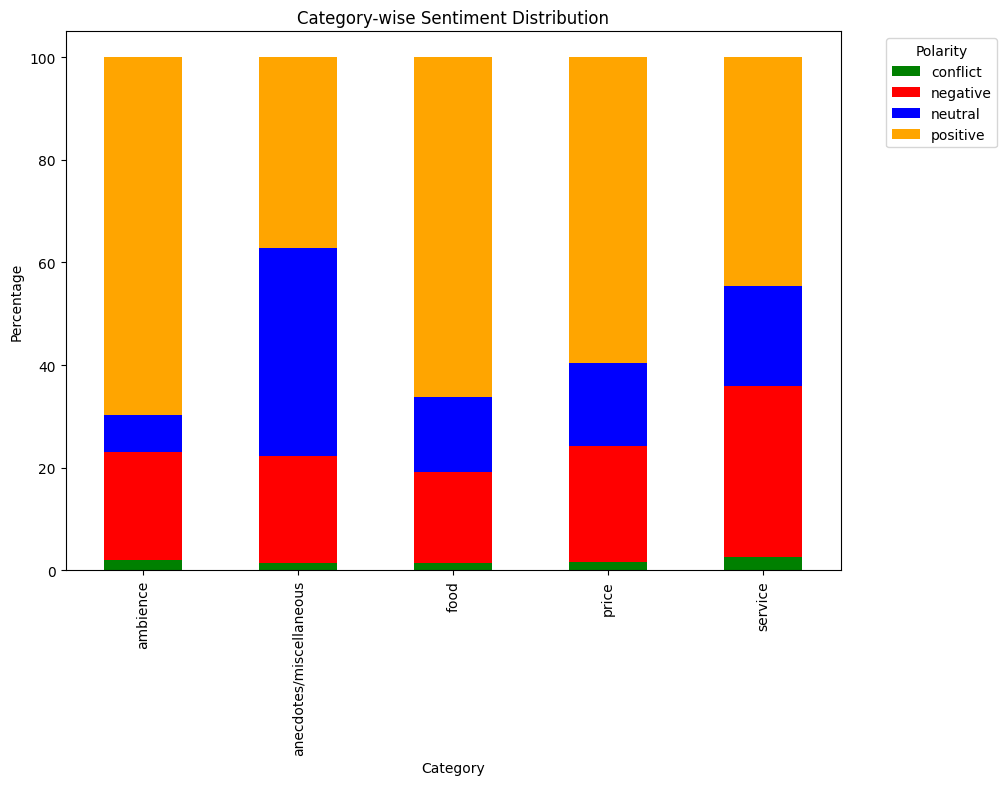

In [39]:
# Plotting category-wise sentiment distribution
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7), color=['green', 'red', 'blue', 'orange'])
plt.title('Category-wise Sentiment Distribution')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Polarity', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
plt.savefig("cat.png")

In [25]:
category_sentiment

polarity,conflict,negative,neutral,positive
category,,,,
ambience,2.102804,21.028037,7.242991,69.626168
anecdotes/miscellaneous,1.418440,20.803783,40.661939,37.115839
food,1.508845,17.741935,14.568158,66.181061
price,1.729107,22.478386,16.138329,59.654179
service,2.605459,33.250620,19.602978,44.540943


### 1. Ambience:
- Most of the reviews (69%) are positive, indicating customers enjoy the restaurant's atmosphere.
- A significant portion (21%) of reviews are negative, suggesting there are some issues with the restaurant's environment that need addressing. We can see the top 10 negative aspects of ambience.

In [30]:
df = data[((data["category"] == "ambience" ) & (data["polarity"] == "negative"))]["aspect"].value_counts()
list(df.items())[:10]

[('place', 19),
 ('atmosphere', 6),
 ('tables', 5),
 ('music', 4),
 ('seating', 3),
 ('space', 2),
 ('room', 2),
 ('spot', 2),
 ('tanks', 2),
 ('food', 2)]

We observe that, some cusomters are not satistfied with the place, tables, seating

### 2. Food
- The majority of food-related reviews are positive (66%), indicating that customers are generally satisfied with the food quality.
- Some negative(17%) feedback exists, pointing to areas where the food could be improved. We could observe that some customers are not satisfied with the portions.
- A significant portion of neutral(14%) reviews, suggesting that while the food is satisfactory, it may not be outstanding. We could observe that some customers are not satisfied with the menu or food options.

In [31]:
df = data[((data["category"] == "food" ) & (data["polarity"] == "negative"))]["aspect"].value_counts()
list(df.items())[:10]

[('food', 32),
 ('portions', 11),
 ('menu', 10),
 ('cheese', 6),
 ('rice', 6),
 ('sushi', 5),
 ('sauce', 4),
 ('menu,', 4),
 ('food.', 4),
 ('service', 4)]

In [54]:
df = data[((data["category"] == "food" ) & (data["polarity"] == "negative") & (data["aspect"] == "rice"))]["text"].value_counts()
list(df.items())[:10]

[('The rice was poor quality and was cooked so badly it was hard.', 1),
 ('The fish was not fresh and the rice tasted old and stale.', 1),
 ('The red curry is weak and tasteless, the pad thai is stuck together and lumpy, the rice is often overcooked, and the seafood is pretty sketchy.',
  1),
 ('Stay away from the two specialty rolls on the menu, though- too much avocado and rice will fill you up right quick.',
  1),
 ('They had scrapped the bottom of the vessel in which they make the rice -RESULT - WE HAD LARGE CHUNKS OF BURNT RICE IN OUR SERVING BOWL.',
  1),
 ('Furthermore, the rice had no seasoning, so the sushi was bland and disgusting.',
  1)]

We can observe the customers who gave negative feedback are not happy with the portions.

In [32]:
df = data[((data["category"] == "food" ) & (data["polarity"] == "neutral"))]["aspect"].value_counts()
list(df.items())[:10]

[('food', 27),
 ('menu', 9),
 ('menu,', 4),
 ('food.', 4),
 ('dish', 4),
 ('Food', 4),
 ('dinner', 4),
 ('lunch', 3),
 ('bar', 3),
 ('dishes', 3)]

### 3. Price
- Most reviews (59%) regarding price are positive, indicating customers feel the pricing is fair or good value.
- A significant portion of negative (16%) feedback suggests some customers find the prices too high or not worth it.
- (14%) A fair amount of neutral sentiment indicates mixed feelings about the pricing.

In [33]:
df = data[((data["category"] == "price" ) & (data["polarity"] == "negative"))]["aspect"].value_counts()
list(df.items())[:10]

[('prices', 10),
 ('price', 5),
 ('bill', 3),
 ('food', 3),
 ('prices.', 3),
 ('sandwiches', 2),
 ('price.', 2),
 ('roll', 2),
 ('Prices', 2),
 ('bills', 2)]

In [34]:
df = data[((data["category"] == "price" ) & (data["polarity"] == "neutral"))]["aspect"].value_counts()
list(df.items())[:10]

[('bill', 3),
 ('prices', 3),
 ('dinner', 2),
 ('drinks.', 2),
 ('food', 2),
 ('pickels and slaw,', 1),
 ('cokes', 1),
 ('prices.', 1),
 ('chips', 1),
 ('side.', 1)]

### 4. Service
- Less than half of the service-related reviews are positive, indicating some dissatisfaction with the service..
- A high percentage of negative (33%) feedback suggests significant issues with the service that need urgent attention..
- A substantial amount (19%) of neutral sentiment indicates mixed or indifferent experiences with the service.

In [56]:
df = data[((data["category"] == "service" ) & (data["polarity"] == "negative"))]["aspect"].value_counts()
list(df.items())[:10]

[('service', 36),
 ('table', 11),
 ('staff', 9),
 ('waiter', 9),
 ('service,', 8),
 ('waitress', 8),
 ('wait', 7),
 ('food', 7),
 ('manager', 6),
 ('Service', 5)]

In [59]:
df = data[((data["category"] == "service" ) & (data["polarity"] == "negative")& (data["aspect"] == "Service"))]["text"].value_counts()
list(df.items())[:20]

[('Service could be improved but overall this is a place that understands the importance of little things (the heavy, black, antique-seeming teapot, for one) in the restaurant experience.',
  1),
 ('Service is not what one would expect from a joint in this price category.',
  1),
 ('Service was slow had to wait to order and get food although not crowded.',
  1),
 ('Service was also horrible and the ambience is not that great.', 1),
 ('Service was slow, but the people were friendly.', 1)]

In [37]:
df = data[((data["category"] == "service" ) & (data["polarity"] == "neutral"))]["aspect"].value_counts()
list(df.items())[:10]

[('table', 9),
 ('service', 7),
 ('food', 6),
 ('bar', 5),
 ('reservation', 5),
 ('dessert', 3),
 ('check', 3),
 ('drink', 3),
 ('water', 3),
 ('service.', 3)]

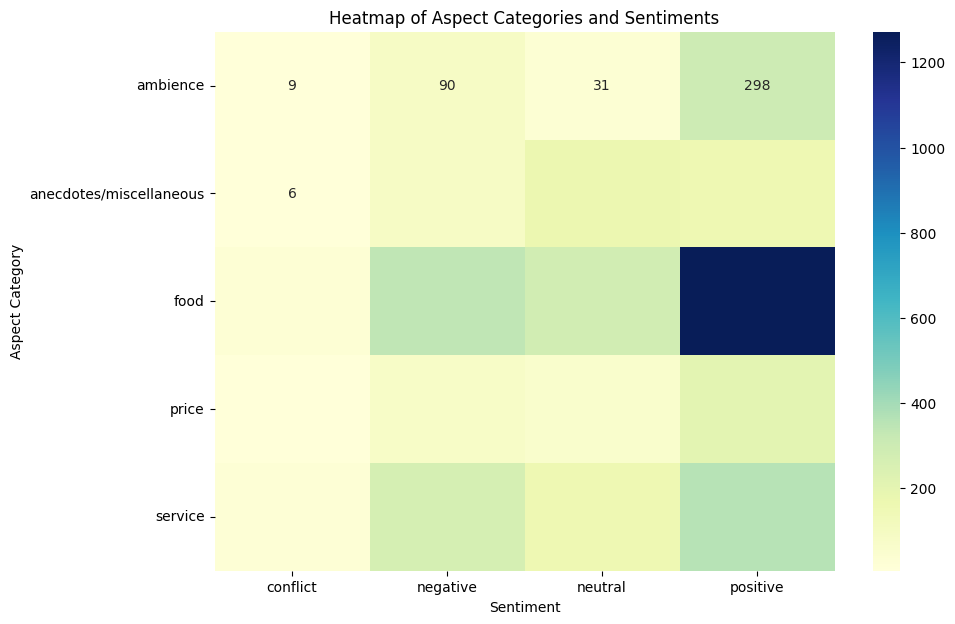

In [8]:
import seaborn as sns

# Creating a pivot table for heatmap
category_sentiment_pivot = predictions_df.pivot_table(index='category', columns='polarity', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(category_sentiment_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Aspect Categories and Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Aspect Category')
plt.show()
